In [1]:
import numpy as np
import pandas as pd
import warnings
import matplotlib.pyplot as plt
import seaborn as sns
import math

%matplotlib inline
%run function.ipynb

In [2]:
df = pd.read_csv('clean.csv', index_col=0)
df_copy = df.copy()
display(df_copy.iloc[:5,:18])
display(df_copy.iloc[:5,18:])

,LoanNr_ChkDgt,Name,City,State,Zip,Bank,BankState,ApprovalDate,Term,NoEmp,NewExist,CreateJob,RetainedJob,IsFranchised,UrbanRural,RevLineCr,LowDoc,ChgOffDate
0,1000014003,ABC HOBBYCRAFT,EVANSVILLE,IN,47711,FIFTH THIRD BANK,OH,28-Feb-97,84.0,4.0,0.0,0.0,0.0,0.0,-1,0.0,1.0,NaN
1,1000024006,LANDMARK BAR & GRILLE (THE),NEW PARIS,IN,46526,1ST SOURCE BANK,IN,28-Feb-97,60.0,2.0,0.0,0.0,0.0,0.0,-1,0.0,1.0,NaN
2,1000034009,"WHITLOCK DDS, TODD M.",BLOOMINGTON,IN,47401,GRANT COUNTY STATE BANK,IN,28-Feb-97,180.0,7.0,1.0,0.0,0.0,0.0,-1,0.0,0.0,NaN
3,1000044001,"BIG BUCKS PAWN & JEWELRY, LLC",BROKEN ARROW,OK,74012,1ST NATL BK & TR CO OF BROKEN,OK,28-Feb-97,60.0,2.0,1.0,0.0,0.0,0.0,-1,0.0,1.0,NaN
4,1000054004,"ANASTASIA CONFECTIONS, INC.",ORLANDO,FL,32801,FLORIDA BUS. DEVEL CORP,FL,28-Feb-97,240.0,14.0,1.0,7.0,7.0,0.0,-1,0.0,0.0,NaN


,DisbursementDate,DisbursementGross,BalanceGross,MIS_Status,ChgOffPrinGr,GrAppv,SBA_Appv,ChgOffDate_year,ChgOffDate_month,ChgOffDate_day,DisbursementDate_year,DisbursementDate_month,DisbursementDate_day,ApprovalDate_year,ApprovalDate_month,ApprovalDate_day,Industry
0,28-Feb-99,60000.0,0.0,P I F,0.0,60000.0,48000.0,NaN,NaN,NaN,1999.0,2.0,28.0,1997.0,2.0,28.0,Retail_trade
1,31-May-97,40000.0,0.0,P I F,0.0,40000.0,32000.0,NaN,NaN,NaN,1997.0,5.0,31.0,1997.0,2.0,28.0,Accom/Food_serv
2,31-Dec-97,287000.0,0.0,P I F,0.0,287000.0,215250.0,NaN,NaN,NaN,1997.0,12.0,31.0,1997.0,2.0,28.0,Healthcare/Social_assist
3,30-Jun-97,35000.0,0.0,P I F,0.0,35000.0,28000.0,NaN,NaN,NaN,1997.0,6.0,30.0,1997.0,2.0,28.0,Unknown
4,14-May-97,229000.0,0.0,P I F,0.0,229000.0,229000.0,NaN,NaN,NaN,1997.0,5.0,14.0,1997.0,2.0,28.0,Unknown


In [3]:
num_features = ['Term', 'NoEmp', 'CreateJob', 'RetainedJob', 'DisbursementGross', 
                'BalanceGross', 'ChgOffPrinGr', 'GrAppv', 'SBA_Appv']

display(df_copy[num_features].describe())
df_copy[num_features] = df_copy[num_features].astype('float64')
display(df_copy[num_features].dtypes)

,Term,NoEmp,CreateJob,RetainedJob,DisbursementGross,BalanceGross,ChgOffPrinGr,GrAppv,SBA_Appv
count,899158.000000,899158.000000,899158.000000,899158.000000,8.991580e+05,899158.000000,8.991580e+05,8.991580e+05,8.991580e+05
mean,110.773210,11.411276,8.410859,10.777755,2.011519e+05,2.989369,1.358260e+04,1.926848e+05,1.494871e+05
std,78.857172,74.108402,236.325497,236.758791,2.876380e+05,1442.166724,6.514381e+04,2.832604e+05,2.284126e+05
min,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000e+00,2.000000e+02,1.000000e+02
25%,60.000000,2.000000,0.000000,0.000000,4.200000e+04,0.000000,0.000000e+00,3.500000e+04,2.125000e+04
50%,84.000000,4.000000,0.000000,1.000000,1.000000e+05,0.000000,0.000000e+00,9.000000e+04,6.125000e+04
75%,120.000000,10.000000,1.000000,4.000000,2.380000e+05,0.000000,0.000000e+00,2.250000e+05,1.750000e+05
max,569.000000,9999.000000,8800.000000,9500.000000,1.144632e+07,996262.000000,3.512596e+06,5.472000e+06,5.472000e+06


Term                 float64
NoEmp                float64
CreateJob            float64
RetainedJob          float64
DisbursementGross    float64
BalanceGross         float64
ChgOffPrinGr         float64
GrAppv               float64
SBA_Appv             float64
dtype: object

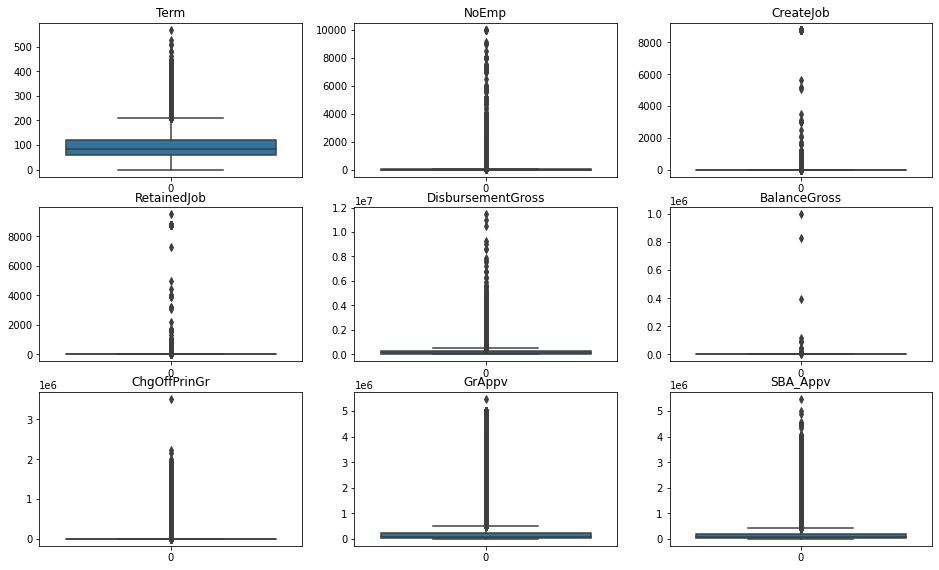

In [4]:
# 透過boxplot檢查outlier
plt.figure(figsize=(16, 30))

for i in range(len(num_features)):
    plt.subplot(len(num_features), 3, i + 1)
    plt.title(num_features[i])
    sns.boxplot(data=df_copy[num_features[i]])

data contains 812178 rows and was divided into 20 groups.
data contains 715573 rows and was divided into 20 groups.
data contains 246646 rows and was divided into 18 groups.
data contains 436012 rows and was divided into 19 groups.
data contains 850300 rows and was divided into 20 groups.
data contains 141648 rows and was divided into 17 groups.
data contains 850008 rows and was divided into 20 groups.
data contains 848707 rows and was divided into 20 groups.


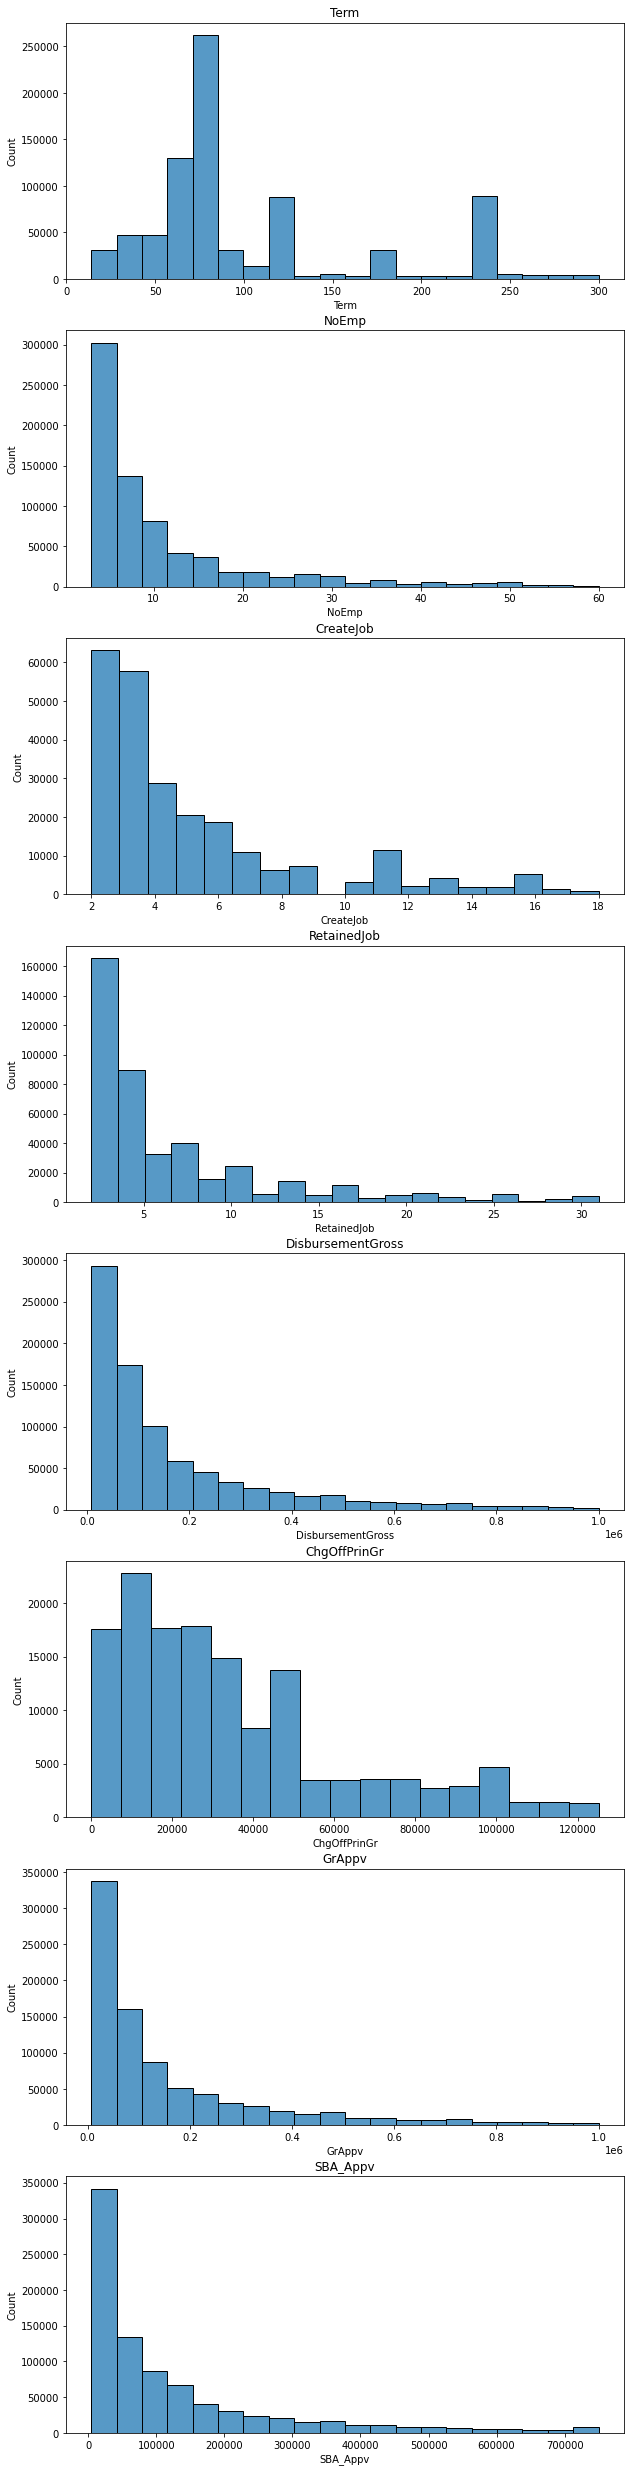

In [5]:
df_log = df_copy.copy()
df_log[num_features] = df_log[num_features] + 1

# 視覺化數值型欄位
count = 1

plt.figure(figsize=(10,50))
for i in range(len(num_features)):
    vis = df_log[num_features[i]]
    upb = np.percentile(vis, 97.5)
    lwb = np.percentile(vis, 2.5)
    vis = vis[(vis != 0) & (vis > lwb) & (vis < upb)]
    
    if len(vis) == 0:
        continue
    
    plt.subplot(len(num_features), 1, count)
    plt.title(num_features[i])
    
    binnum = math.floor(1 + 3.3 * np.log10(len(vis)))
    print('data contains {} rows and was divided into {} groups.'.format(len(vis), binnum))
    
    sns.histplot(data=vis, log_scale=False, bins=binnum)
    count += 1
plt.show()

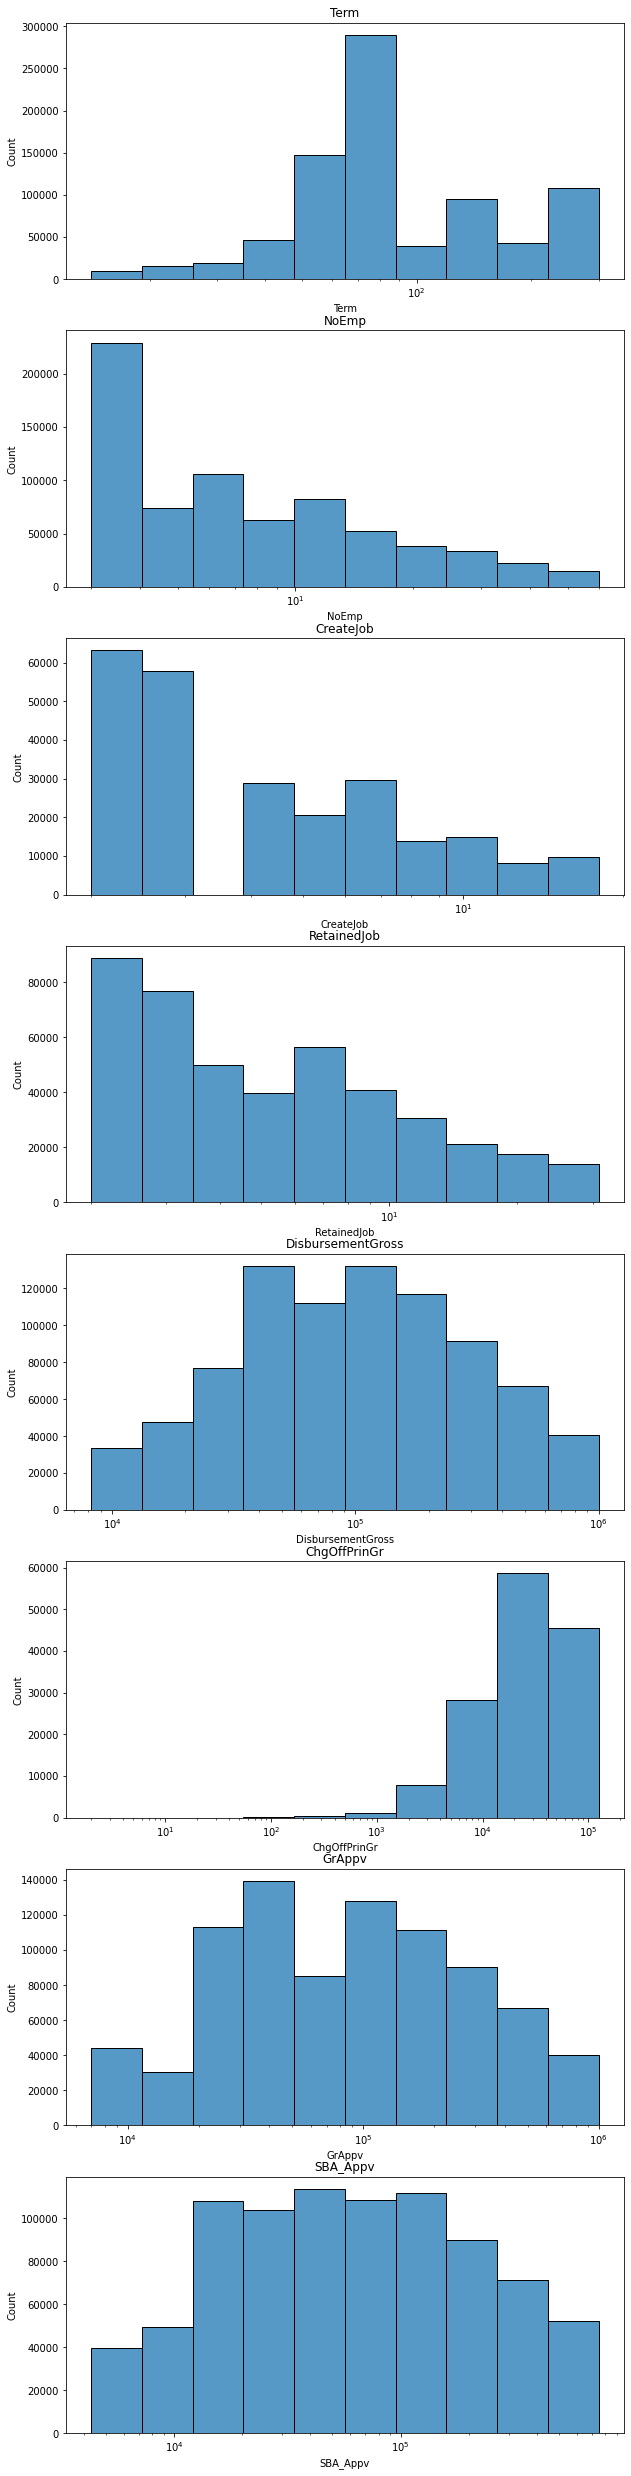

In [6]:
# 視覺化數值型欄位(去偏)
count = 1

plt.figure(figsize=(10,50))
for i in range(len(num_features)):
    vis = df_log[num_features[i]]
    upb = np.percentile(vis, 97.5)
    lwb = np.percentile(vis, 2.5)
    vis = vis[(vis != 0) & (vis > lwb) & (vis < upb)]
    
    if len(vis) == 0:
        continue
    
    plt.subplot(len(num_features), 1, count)
    plt.title(num_features[i])
    
    sns.histplot(data=vis, log_scale=True, bins=10)
    count += 1
plt.show()

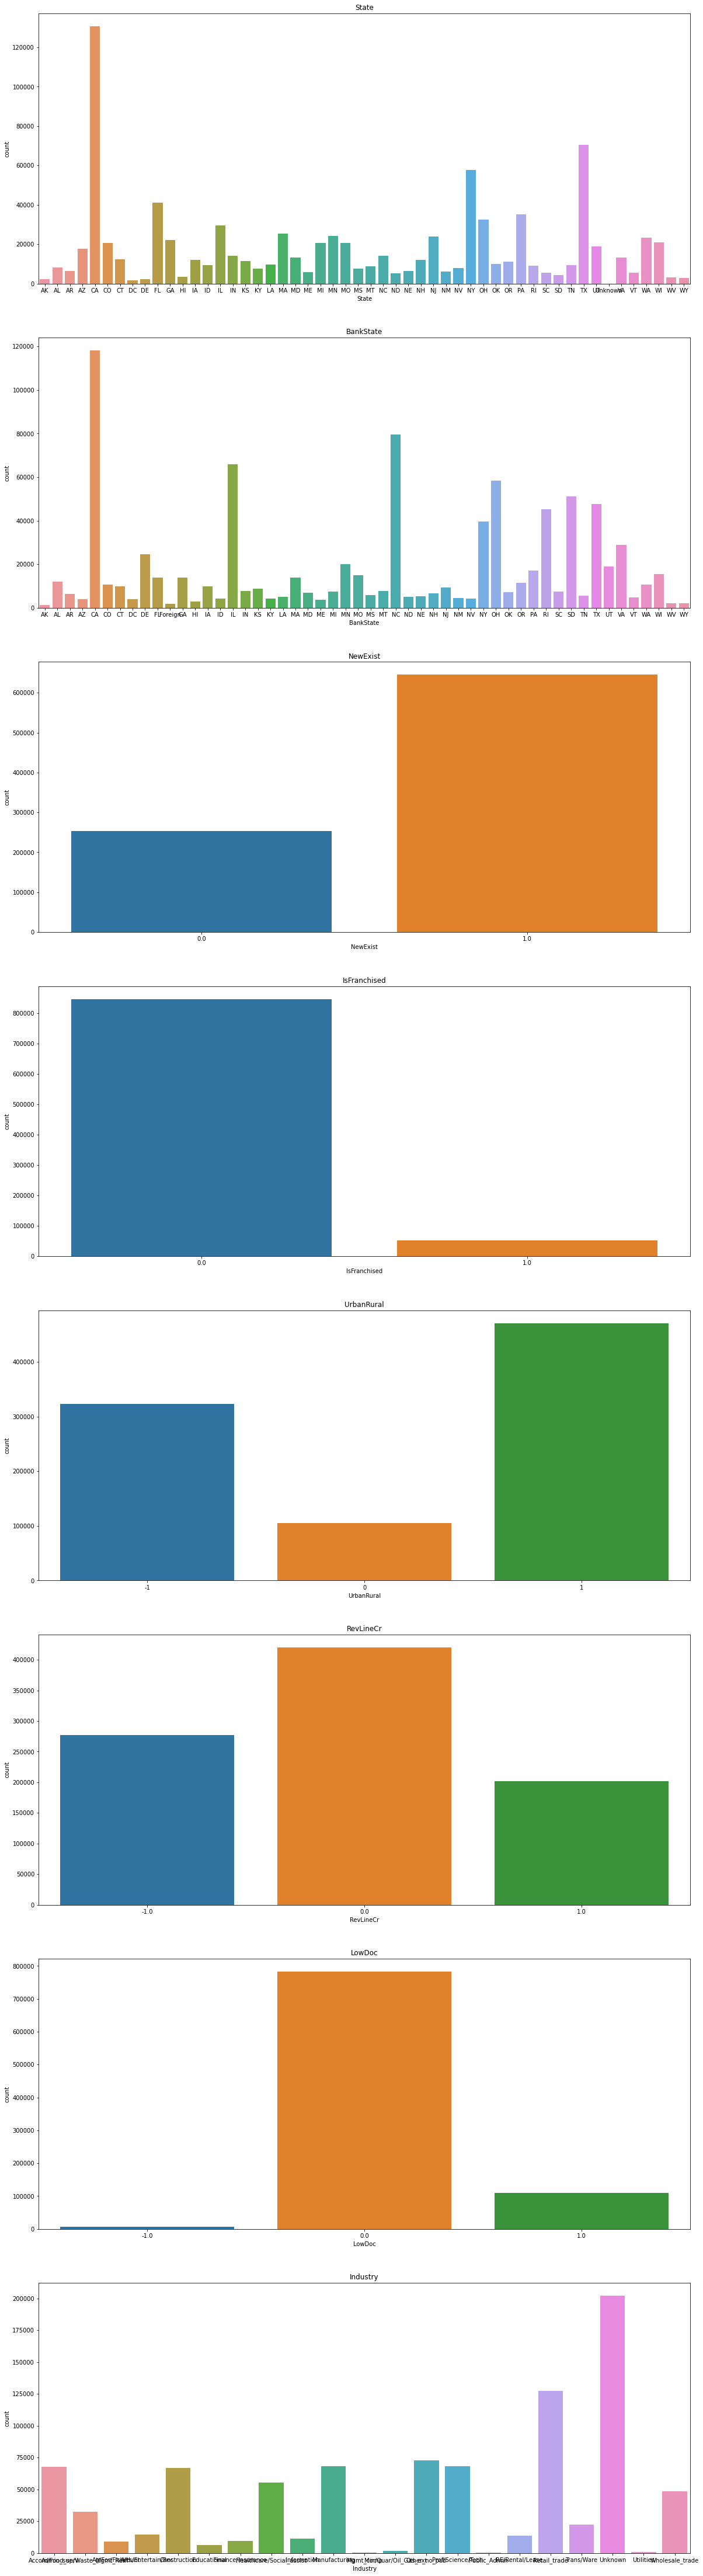

In [7]:
obj_cols = ['State', 'BankState', 'NewExist', 'IsFranchised', 'UrbanRural', 'RevLineCr', 'LowDoc', 'Industry']

# 類別型欄位視覺化
plt.figure(figsize=(20,80))

for i in range(len(obj_cols)):
    plt.subplot(len(obj_cols), 1, i + 1)
    plt.title(obj_cols[i])
    df_temp = pd.DataFrame(df_copy.groupby(obj_cols[i]).size(), columns=['count'])
    sns.barplot(x=df_temp.index, y=df_temp['count'])

plt.show()

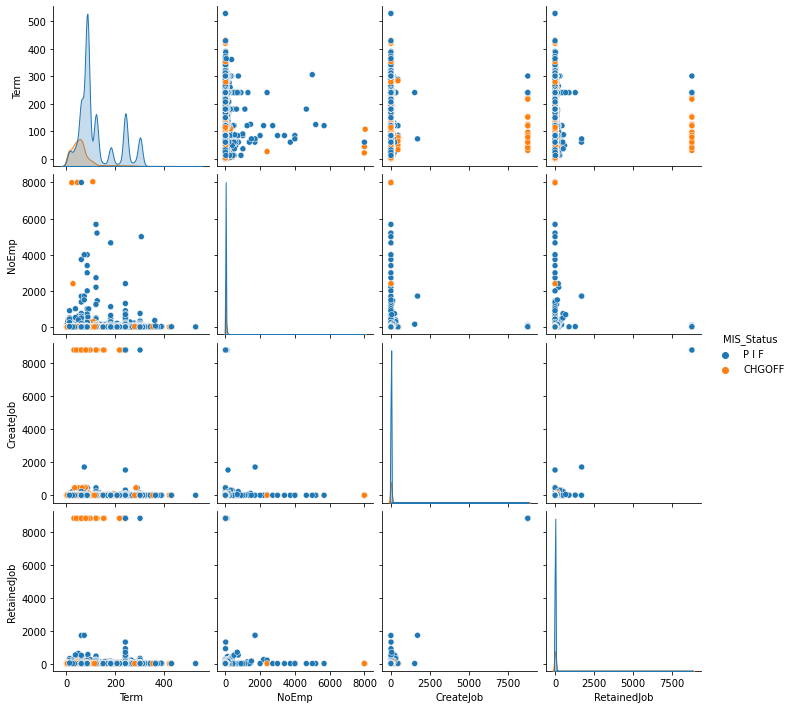

In [13]:
df_vis = pd.concat([df_log[num_features[:4]], df_log['MIS_Status']], axis=1)
# df_vis = df_vis.drop('BalanceGross', axis=1)
df_vis = df_vis.sample(frac=0.1, random_state=0, axis=0)
sns.pairplot(df_vis, hue='MIS_Status')

c:\users\jack\appdata\local\programs\python\python39\lib\site-packages\seaborn\distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
c:\users\jack\appdata\local\programs\python\python39\lib\site-packages\seaborn\distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)


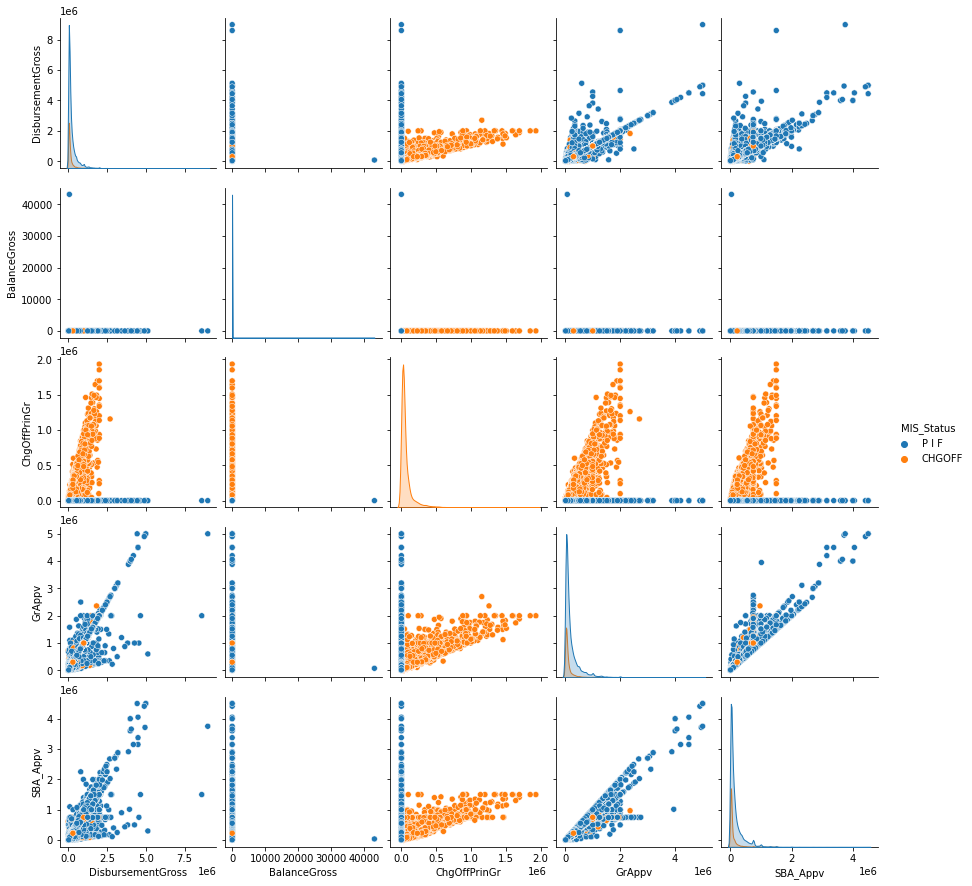

In [14]:
df_vis = pd.concat([df_log[num_features[4:]], df_log['MIS_Status']], axis=1)
# df_vis = df_vis.drop('BalanceGross', axis=1)
df_vis = df_vis.sample(frac=0.1, random_state=0, axis=0)
sns.pairplot(df_vis, hue='MIS_Status')

c:\users\jack\appdata\local\programs\python\python39\lib\site-packages\seaborn\distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
c:\users\jack\appdata\local\programs\python\python39\lib\site-packages\seaborn\distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)


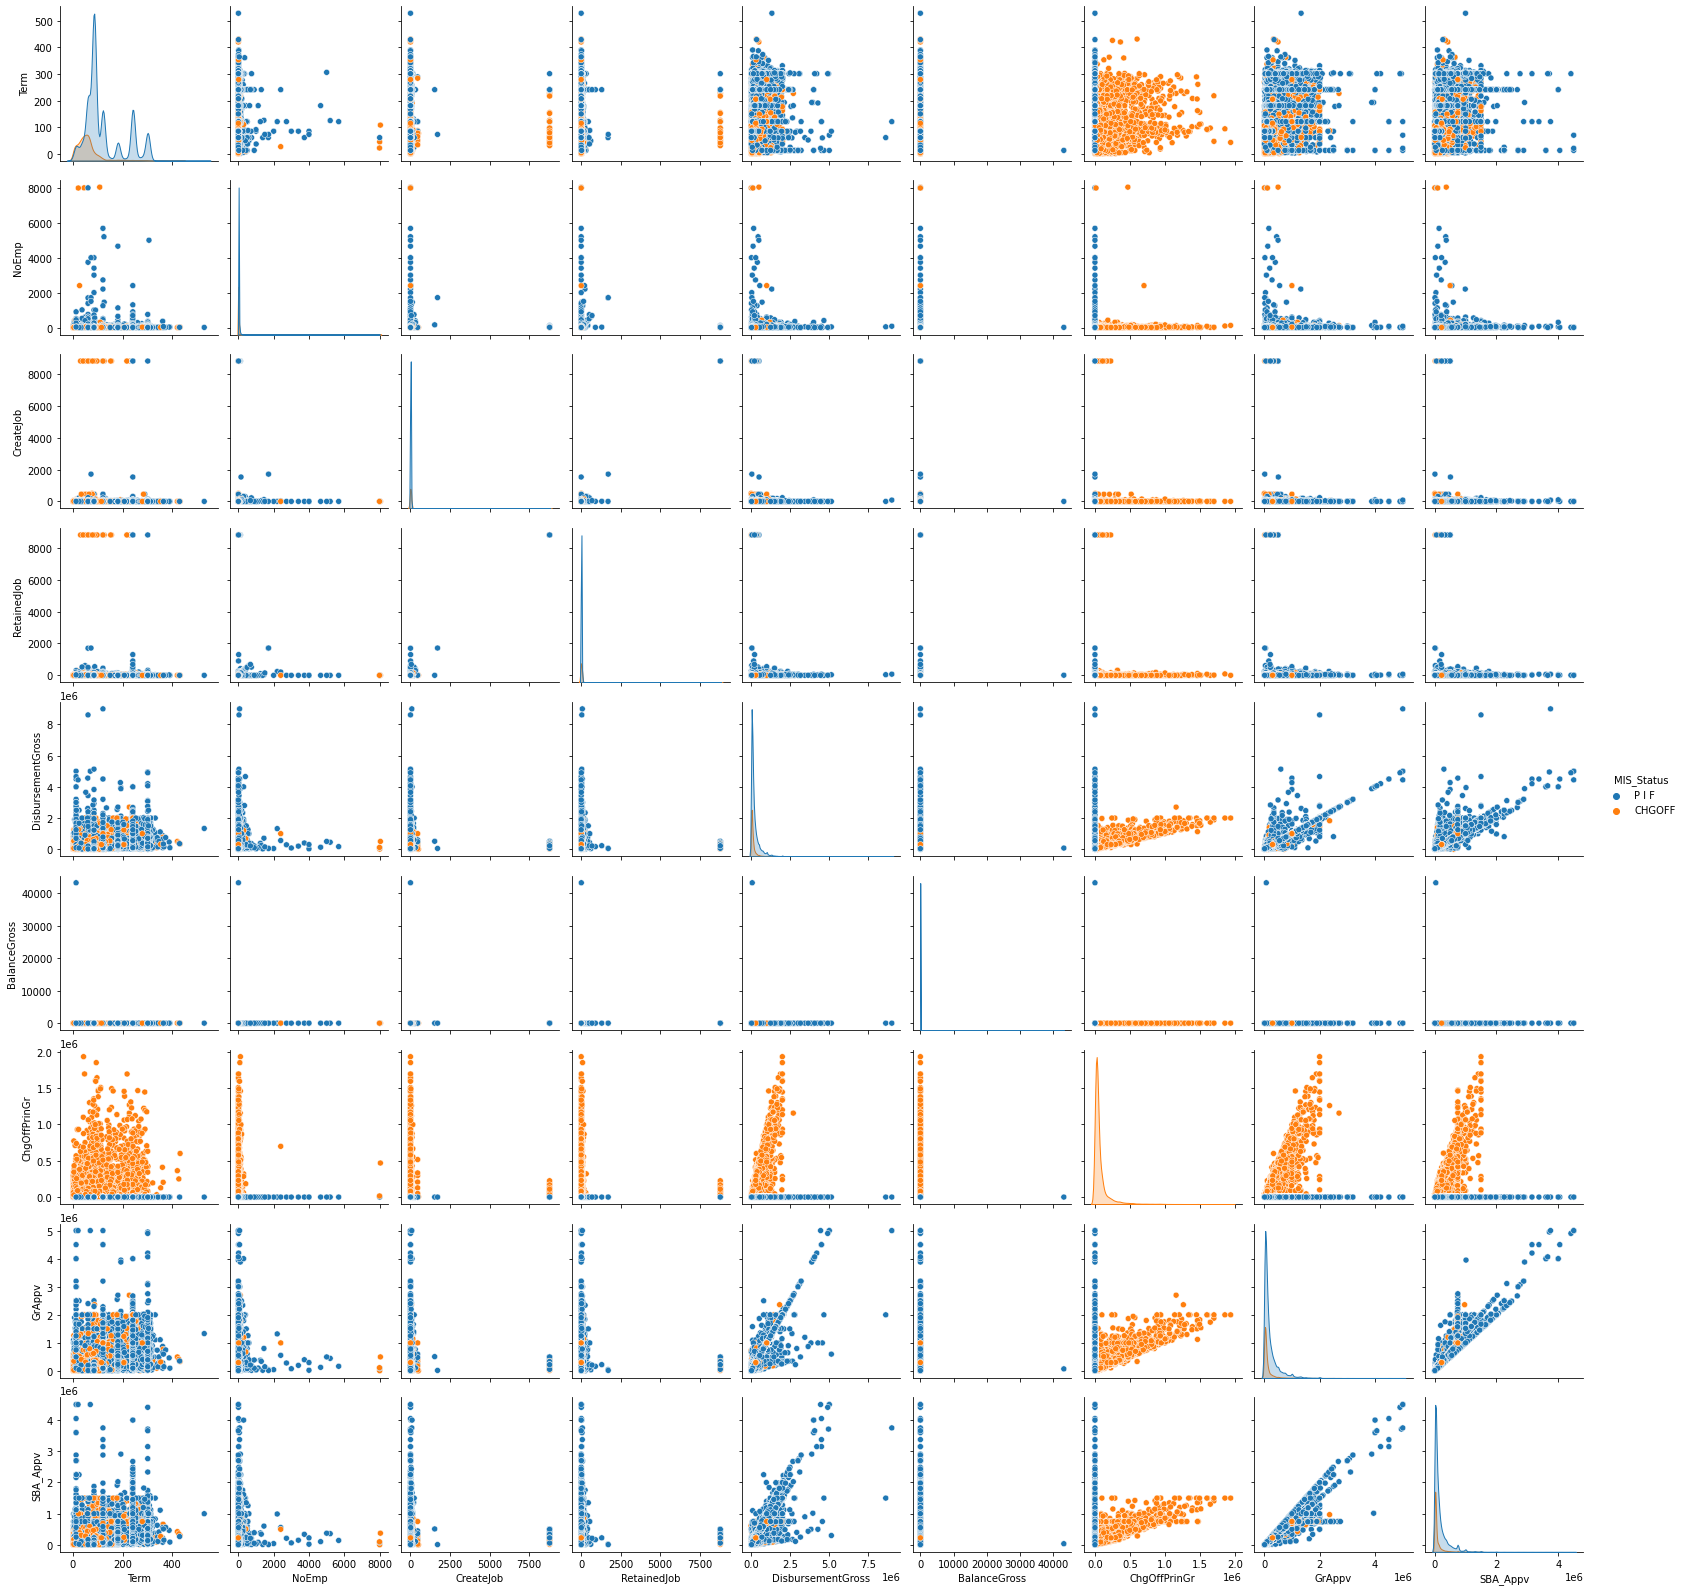

In [16]:
df_vis = pd.concat([df_log[num_features], df_log['MIS_Status']], axis=1)
# df_vis = df_vis.drop('BalanceGross', axis=1)
df_vis = df_vis.sample(frac=0.1, random_state=0, axis=0)
sns.pairplot(df_vis, hue='MIS_Status')